# Part 0

Import the library

In [3]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("TB_burden_countries_2014-09-29.csv", header = 0)

# Count the number of rows
row_count = 1 # Since we skipped the header
for index, row in df.iterrows():
    row_count += 1
print("The number of rows: ", row_count)


# Get the average of column "e_prev_num_lo"
sum_e_prev_num_lo = 0
for index, row in df.iterrows():
    if math.isnan(row["e_prev_num_lo"]) == False:
        sum_e_prev_num_lo += row["e_prev_num_lo"]
avg_e_prev_num_lo = sum_e_prev_num_lo / (row_count - 1)
print(avg_e_prev_num_lo)

# Get the average of column "e_prev_num_lo" for year = 1990
sum_e_prev_num_lo_1990 = 0
row_count_1990 = 0
for index, row in df.iterrows():
    if row["year"] == 1990 and math.isnan(row["e_prev_num_lo"]) == False:
        sum_e_prev_num_lo_1990 += row["e_prev_num_lo"]
        row_count_1990 += 1
avg_e_prev_num_lo_1990 = sum_e_prev_num_lo_1990 / row_count_1990
print(avg_e_prev_num_lo_1990)

# Get the average of column "e_prev_num_lo" for year = 2011
sum_e_prev_num_lo_2011 = 0
row_count_2011 = 0
for index, row in df.iterrows():
    if row["year"] == 2011 and math.isnan(row["e_prev_num_lo"]) == False:
        sum_e_prev_num_lo_2011 += row["e_prev_num_lo"]
        row_count_2011 += 1
avg_e_prev_num_lo_2011 = sum_e_prev_num_lo_2011 / row_count_2011
print(avg_e_prev_num_lo_2011)

The number of rows:  4904
43563.10066897814
44379.73417061612
33320.0524537037


Euclidean distance:  1.163829766350311


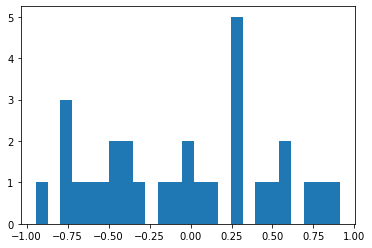

In [6]:
a = np.arange(5, 16)

b = np.linspace(0, 23, 7, endpoint= True)

c = np.random.uniform(-1, 1, 30)

plt.hist(c, bins = 25)

d = np.random.rand(10)
e = np.random.rand(10)
dist = np.sqrt(np.sum(np.square(d-e)))
print("Euclidean distance: ", dist)

# Part 1

Import the data

In [4]:
left_df = pd.read_csv("passengerData.csv", header = 0)
right_df = pd.read_excel("ticketPrices.xlsx", header = 0)

In [5]:
left_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,TicketType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,5


In [10]:
right_df.head()

,TicketType,Fare
0,1,33
1,2,56
2,3,77
3,4,22
4,5,14


Join the dataframe

In [7]:
df = pd.merge(left_df, right_df, on = "TicketType")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,TicketType,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,33
1,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,1,33
2,17,0,3,"Rice, Master. Eugene",male,2.0,1,33
3,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,1,33
4,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,1,33


In [17]:
df.loc[df["Age"] == df["Age"].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,TicketType,Fare
747,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,7,87


Plot the data on a scatter plot that shows the Age vs. Ticket Prices

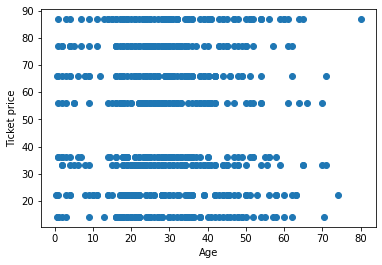

In [25]:
plt.scatter(df["Age"], df["Fare"])
plt.xlabel("Age")
plt.ylabel("Ticket price")
plt.show()

Plot only the data that shows female passengers aged 40 to 50 and who paid more than or equal to 40

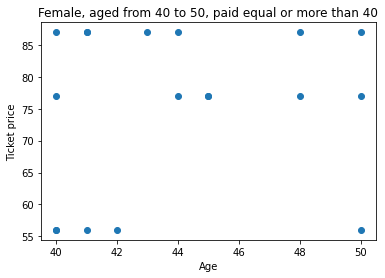

In [34]:
df_female_40 = df.loc[(df["Sex"] == "female") & (df["Age"] >= 40) & (df["Age"] <= 50) & (df["Fare"] >= 40)]
plt.scatter(df_female_40["Age"], df_female_40["Fare"])
plt.title("Female, aged from 40 to 50, paid equal or more than 40")
plt.xlabel("Age")
plt.ylabel("Ticket price")
plt.show()

# Path 2

Load the dataset

In [15]:
df_2 = pd.read_csv("titanicSurvival_m.csv", header = 0)
df_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Find the counts of missing values in each column

In [38]:
df_2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            46
Cabin          687
Embarked         2
dtype: int64

So, we can see that there are 177, 46, 687 and 2 missing values in "Age", "Fare", "Cabin" and "Embarked" consecutively

In [5]:
df_2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,845.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.304319
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.792612
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Replace the missing values in "Age" and "Fare" columns with 0 values, and visualise in a scatterplot

In [10]:
df_2["Age"].fillna("0", inplace = True)
df_2["Fare"].fillna("0", inplace = True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,0,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,0,NaN,C


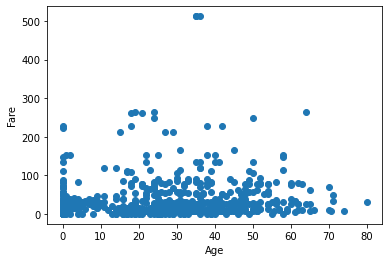

In [14]:
plt.scatter(df_2["Age"], df_2["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

Replace the missing values in "Age" and "Fare" columns with the mean of each column, and visualise in a scatterplot

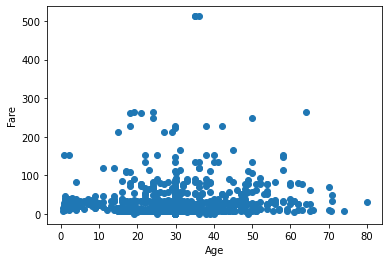

In [18]:
df_2["Age"].fillna(df_2["Age"].mean(), inplace = True)
df_2["Fare"].fillna(df_2["Fare"].mean(), inplace = True)
plt.scatter(df_2["Age"], df_2["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

So, since the first plot is showing data with "NaN" replaced with "0". 
In term of "Age", we can see a lot scatter point arroung "0" in the first plot, which is different from the second graph, where most of values lies at the middle.
It is no significant difference in term of "Fare" shown in the plots, since the column has only 46 missing values (very little compared to amount of missing values in "Age")

# Part 3

In [71]:
df_3 = pd.read_csv("TB_burden_countries_2014-09-29.csv", header = 0)
# replace all of missing values by "0"
df_3.fillna("0", inplace = True)
df_3.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,327.0,112.0,655.0,...,0.35,0.22,0.52,41.0,25.0,60.0,Model,20.0,13.0,32.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,359.0,172.0,613.0,...,0.36,0.19,0.58,45.0,24.0,73.0,Model,97.0,77.0,120.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,387.0,169.0,693.0,...,0.37,0.19,0.62,51.0,26.0,86.0,Model,0,0,0
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,412.0,186.0,724.0,...,0.38,0.2,0.63,58.0,30.0,95.0,Model,0,0,0
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,431.0,199.0,751.0,...,0.4,0.21,0.64,65.0,35.0,100.0,Model,0,0,0


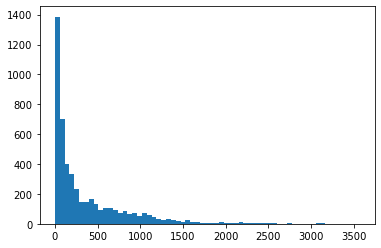

In [34]:
# using Freedman–Diaconis to calculate the bins width
e_prev_100k_hi = df_3["e_prev_100k_hi"].astype(float)
q25, q75 = np.percentile(e_prev_100k_hi, [25, 75])
bin_width = 2 * (q75 - q25) * len(e_prev_100k_hi) ** (-1/3)
# number of bins
bins = round((e_prev_100k_hi.max() - e_prev_100k_hi.min()) / bin_width)
# make the plot
plt.hist(e_prev_100k_hi, bins=bins);

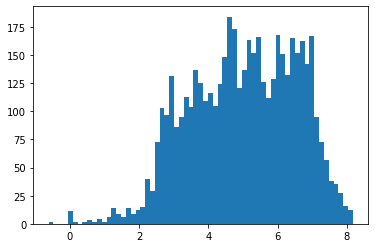

In [37]:
e_prev_100k_hi_log = np.log(e_prev_100k_hi, out=np.zeros_like(e_prev_100k_hi), where=(e_prev_100k_hi!=0))
plt.hist(e_prev_100k_hi_log, bins=bins);

Normalize the data to [0,1]

In [99]:
# can check the info after apply
# df_3.apply(pd.to_numeric, errors='ignore').info()
df_3_numeric = df_3.apply(pd.to_numeric, errors='ignore')
# drop columns that isn't numeric
df_3_numeric.drop(["country","iso2", "iso3", "g_whoregion", "source_mort", "source_tbhiv"], axis = 1, inplace=True)

,iso_numeric,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,e_prev_num,e_prev_num_lo,e_prev_num_hi,e_mort_exc_tbhiv_100k,...,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,c_cdr,c_cdr_lo,c_cdr_hi
0,4,1990,11731193,327.0,112.0,655.0,38000.0,13000.0,77000.0,31.0,...,0.0,0.35,0.22,0.52,41.0,25.0,60.0,20.0,13.0,32.0
1,4,1991,12612043,359.0,172.0,613.0,45000.0,22000.0,77000.0,35.0,...,0.0,0.36,0.19,0.58,45.0,24.0,73.0,97.0,77.0,120.0
2,4,1992,13811876,387.0,169.0,693.0,53000.0,23000.0,96000.0,39.0,...,0.0,0.37,0.19,0.62,51.0,26.0,86.0,0.0,0.0,0.0
3,4,1993,15175325,412.0,186.0,724.0,62000.0,28000.0,110000.0,42.0,...,0.0,0.38,0.20,0.63,58.0,30.0,95.0,0.0,0.0,0.0
4,4,1994,16485018,431.0,199.0,751.0,71000.0,33000.0,120000.0,46.0,...,0.0,0.40,0.21,0.64,65.0,35.0,100.0,0.0,0.0,0.0


In [105]:
# normalise by dividing for the max
df_3_max = df_3_numeric.max(numeric_only="True")
df_3_normalised = df_3_numeric.divide(df_3_max)
# describe
df_3_normalised.describe()

,iso_numeric,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,e_prev_num,e_prev_num_lo,e_prev_num_hi,e_mort_exc_tbhiv_100k,...,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,c_cdr,c_cdr_lo,c_cdr_hi
count,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,...,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,0.484885,0.994554,2.105332e-02,0.111413,0.071028,0.105831,0.014998,0.010891,0.020427,0.073494,...,0.092496,0.024821,0.025100,0.024846,0.013138,0.012529,0.014207,0.181429,0.219129,0.047366
std,0.285462,0.003302,8.553173e-02,0.144945,0.104811,0.140482,0.071760,0.068169,0.079778,0.108212,...,0.177536,0.090028,0.092327,0.089382,0.060681,0.060386,0.064201,0.093002,0.115772,0.030608
min,0.004474,0.989066,8.198597e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237136,0.991551,4.000414e-04,0.013441,0.007599,0.012903,0.000085,0.000040,0.000148,0.006335,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123529,0.141667,0.033750
50%,0.480984,0.994533,3.732818e-03,0.049462,0.028116,0.045722,0.000978,0.000475,0.001558,0.024434,...,0.009773,0.000295,0.000274,0.000296,0.000106,0.000104,0.000105,0.205882,0.241667,0.053750
75%,0.722595,0.997515,1.257952e-02,0.164247,0.098024,0.147546,0.006522,0.003250,0.010096,0.099548,...,0.097727,0.006950,0.006806,0.006876,0.002288,0.002148,0.002308,0.255882,0.320833,0.061875
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
